<center>
<img src="./images/main_arcada.png" style="width:1400px">
</center>

## Lecture 3: Model Evaluation and Improvement
*Resampling methods, Grid Search, Evaluation Metrics and Scoring*


>Leonardo A. Espinosa, Researcher.
>Email: leonardo.espinosaleal@arcada.fi
>Personal webpage: www.espinosaleal.me

# Learning goals for today
* Understand the different methods for validating data.
* Being able to understand the different metrics and its peculiarities.

1\. <a href="#/3/1">Resampling methods</a>

2\. <a href="#/14/1">Grid Search</a>:
   * <a href="#/15/1">Simple</a>.
   * <a href="#/24/1">With cross-validation</a>.
 
3\. <a href="#/41/1">Evaluation Metrics and Scoring</a>
   * <a href="#/42/1">Metrics for Binary Classification</a>.
   * <a href="#/78/1">Metrics for Multiclass Classification</a>.
   * <a href="#/83/1">Using Evaluation Metrics in Model Selection</a>
   
4\. <a href="#/88/1">Conclusions</a>

5\. <a href="#/91/1">Homework</a>

6\. <a href="#/92/1">Questions and Worktime</a>



<center><img src="./images/data_squezz.jpg" style="width: 1450px;"/></center>

# Resampling methods

* Drawing samples from a training set and reffiting the model of interest on each sample. 
* A way to obtain additional information about the fitted model.

>Model assessment: Evaluating the model performance.

>Model selection: Selecting the proper level of flexibility.

# Cross-Validation
Cross-validation is primarily a way of measuring the predictive performance of a statistical model. 

### K-Fold cross-validation
<center><img src="./images/04-K-fold_cv.png" style="width: 750px;"/></center>

* Avoid *random* bias during selection of train and test data.
* How sensitive is our model to the selection of the training set.
* Computational cost is *k*.

### Stratified k-fold cross validation
<center><img src="./images/04-SK-fold_cv.png" alt="Drawing" style="width: 780px;"/></center>

* Keeps the proportion between classes in each fold as they are in the whole dataset.
* Good strategy with Imbalanced datasets (but use other strategies if proportion is more than 9 to 1).

### Leave-one-out cross-validation
<center><img src="./images/04-LOO_cv.png" alt="Drawing" style="width: 750px;"/></center>

* Good results in small datasets.
* Warning: Time consuming for large datasets.

### Shuffle-split cross-validation
<center><img src="./images/04-Random_cv.png" alt="Drawing" style="width: 750px;"/></center>
* Good strategy with large datasets.

# Bootstrapping

Quantify the uncertainty associated with a given estimator or statistical learning method.

* It is *easy* to derive estimates for standard errors and confidence intervals for complex estimators.
* It is not proven to work on finite samples. 

<center><img src="./images/bootstrap.png" alt="Drawing" style="width: 750px;"/></center>


<center><img src="./images/questions.png" alt="Drawing" style="width: 750px;"/></center>


# Grid Search

Improve the models' generalization performance by tuning its parameters.


## Simple Grid Search

Using *for* loops over the parameters of a model.

In [63]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from IPython.display import display

from matplotlib import rc
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings; warnings.simplefilter('ignore')

In [64]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {} size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 112 size of test set: 38


In [65]:
# naive grid search implementation
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


## Overfiting *parameters* and the Validation Set

* We have tried different parameters and select the best ones on the *test set*.
* Test data should not be use to assess how good is the model.
* A new independent data set is necessary $\to$ Validation set.

<center><img src="./images/04-TVT_sets.png" alt="Drawing" style="width:1000px" align="middle"/></center>

* **Training set**: build the model.
* **Validation set**: select the parameters of the model.
* **Test set**: evaluate the performance of the selected parameters.

After selecting the best parameters using the validation set, we can rebuild a model using the parameter settings we found, but now training on both the training data and the validation data.

In [66]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {} size of validation set: {} size of test set:" 
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 84 size of validation set: 28 size of test set: 38



In [67]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_valid, y_valid)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [68]:
# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


## Grid Search with Cross-Validation

* For a better estimate of the generalization performance. 

* Instead of using a single split into a training and a validation set, we can use cross-validation to evaluate the performance of each parameter combination.

In [77]:
from sklearn.model_selection import cross_val_score

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [78]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.97
Best parameters:  {'C': 100, 'gamma': 0.01}
Test set score with best parameters: 0.97


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.97
Best parameters: {'C': 120, 'gamma': 0.01}
Best cross-validation score: 0.98

Best estimator:
SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


**best$\underline{}$score$\underline{}$** $\to$ The  mean accuracy over the different splits for the parameters setting. On the training set.


### Analyzing the results (cv$\underline{}$results$\underline{}$)

We can inspect the results of the cross-validated grid search.

In [73]:
# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001544,0.000259,0.000632,0.000073,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
1,0.001564,0.000354,0.000701,0.000133,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
2,0.001571,0.000277,0.000699,0.000146,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
3,0.001647,0.000368,0.000760,0.000238,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22
4,0.001143,0.000012,0.000433,0.000004,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,0.363636,0.380952,0.366071,0.011371,22


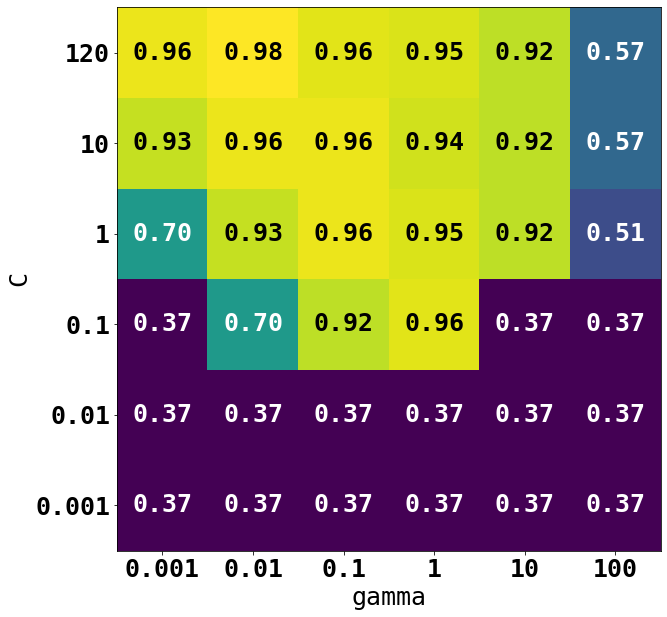

In [74]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [75]:
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

In [85]:
svm?

In [80]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 18}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [35, 10]

def plot_params():
    fig, axes = plt.subplots(1, 3)
    for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                               param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(
                       scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                       yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    plt.colorbar(scores_image, ax=axes.tolist())

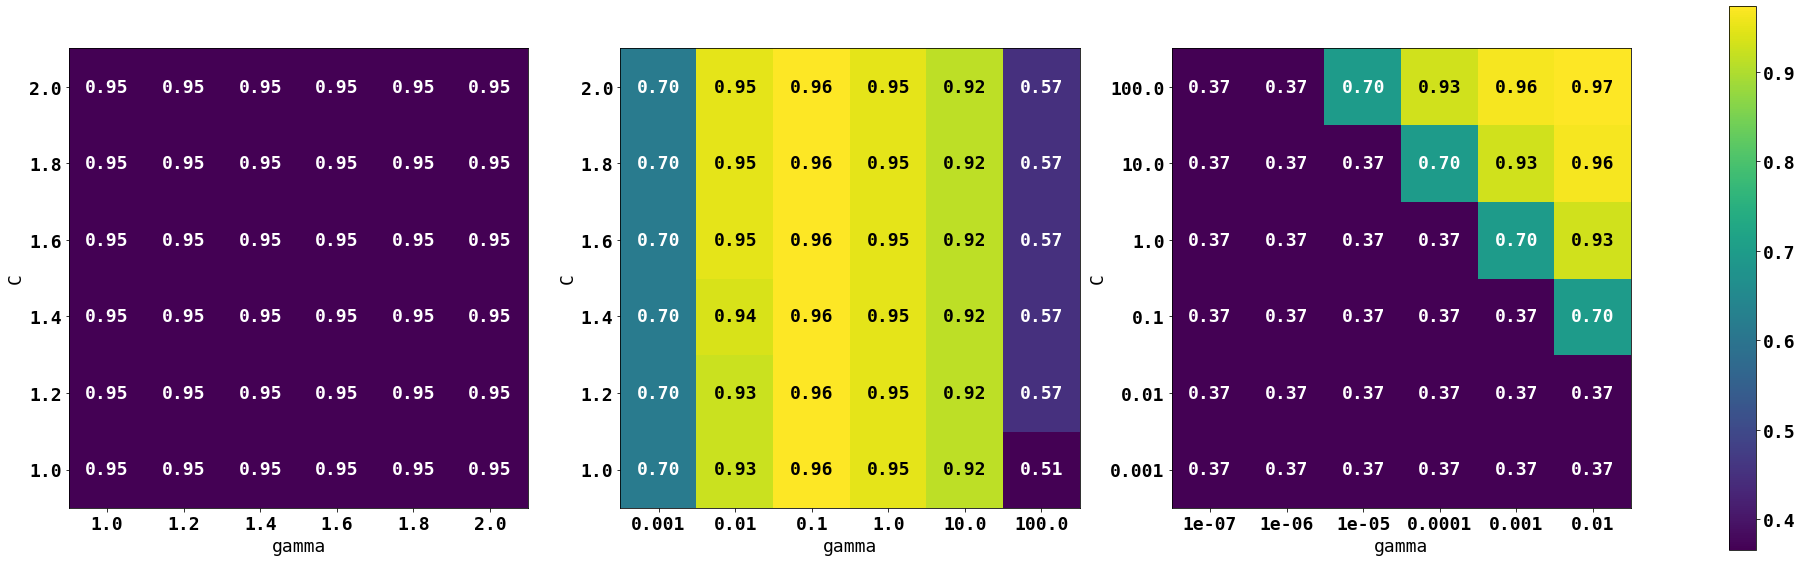

In [81]:
plot_params()

In [82]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 10]

### Search over spaces (not grids)

* In general is not a good idea.
* But, in some cases is possible to try *all possible* combinations of *all paramenters*.
* Pass to GridSearch a **list of dictionaries**. Each dictionary an independent grid.

In [83]:
# We test the SVC classifier with two type of kernels.
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [84]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00169482,0.00157304,0.00130935,0.00111308,0.00115032,0.00110621,0.00106397,0.00115051,0.00108452,0.00107946,...,0.000623798,0.000820875,0.0015058,0.00146899,0.000930023,0.00104799,0.000657082,0.000631142,0.000636292,0.00064435
std_fit_time,0.000633444,0.000854468,0.000216571,5.18847e-05,4.29663e-05,1.0976e-05,1.71161e-05,0.000112053,3.83551e-05,1.42905e-05,...,2.02959e-05,1.52028e-05,0.000218598,1.01876e-05,0.000180381,0.000176199,6.33494e-06,1.54993e-05,2.40769e-05,4.74997e-05
mean_score_time,0.000613642,0.000643587,0.000574398,0.000440884,0.000432682,0.000436735,0.000431299,0.00047226,0.000443935,0.000432634,...,0.000368118,0.000383759,0.000430918,0.000442076,0.00047617,0.000480318,0.000364494,0.000362921,0.000353146,0.00035491
std_score_time,0.000165096,0.000268115,0.000164905,1.80112e-05,9.27494e-06,3.65146e-06,2.89656e-06,7.80521e-05,1.90806e-05,4.5302e-06,...,7.33462e-06,2.3775e-06,1.4648e-05,8.23342e-06,0.000112661,9.44548e-05,6.46813e-07,8.59683e-06,1.08106e-06,5.26382e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.521739,0.347826,0.826087,0.913043,0.956522,1,1


## Extra info


* You can Parallelize the cross-validation and grid search by passing the option `n_jobs=-1`

* GridSearchCV uses stratified *k*-fold cross-validation by default. But you can change it by passing a different
instruction to the **cv** variable. eg. 

    ```from sklearn.model_selection import LeaveOneOut
  loo = LeaveOneOut()
  grid_search = GridSearchCV(SVC(), param_grid, cv=loo)```



<center><img src="./images/questions.png" alt="Drawing" style="width: 750px;"/></center>


# Break

<center>
<img src="./images/break.png" style="width:1200px">
</center>

# Evaluation Metrics and Scoring

<center>
<img src="./images/metrics.png" style="width:1200px">
</center>

Default evaluation metrics in scikit-learn
* for classification: accuracy
* for regression: $R^2$

$R^2$ for regression is the usual one. It is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. However you can also use *Mean Absolute Error* or *Mean Squared Error* but the cases are limited. 

*When selecting a metric, you should always have the end goal of the machine learning application in mind.*

> business metric $\to$ business impact.

**be careful with imbalanced datasets**

In [86]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [87]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


In [88]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [89]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.01).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


## Confusion matrices

* rows $\to$ true classes
* columns $\to$ predicted classes

In [90]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  7  40]]


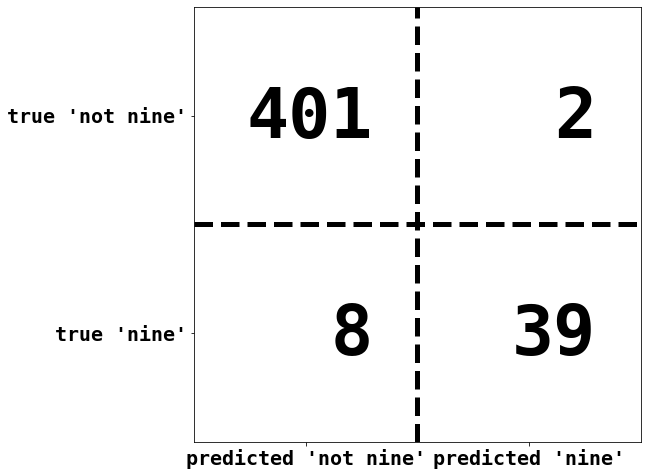

In [36]:
mglearn.plots.plot_confusion_matrix_illustration()

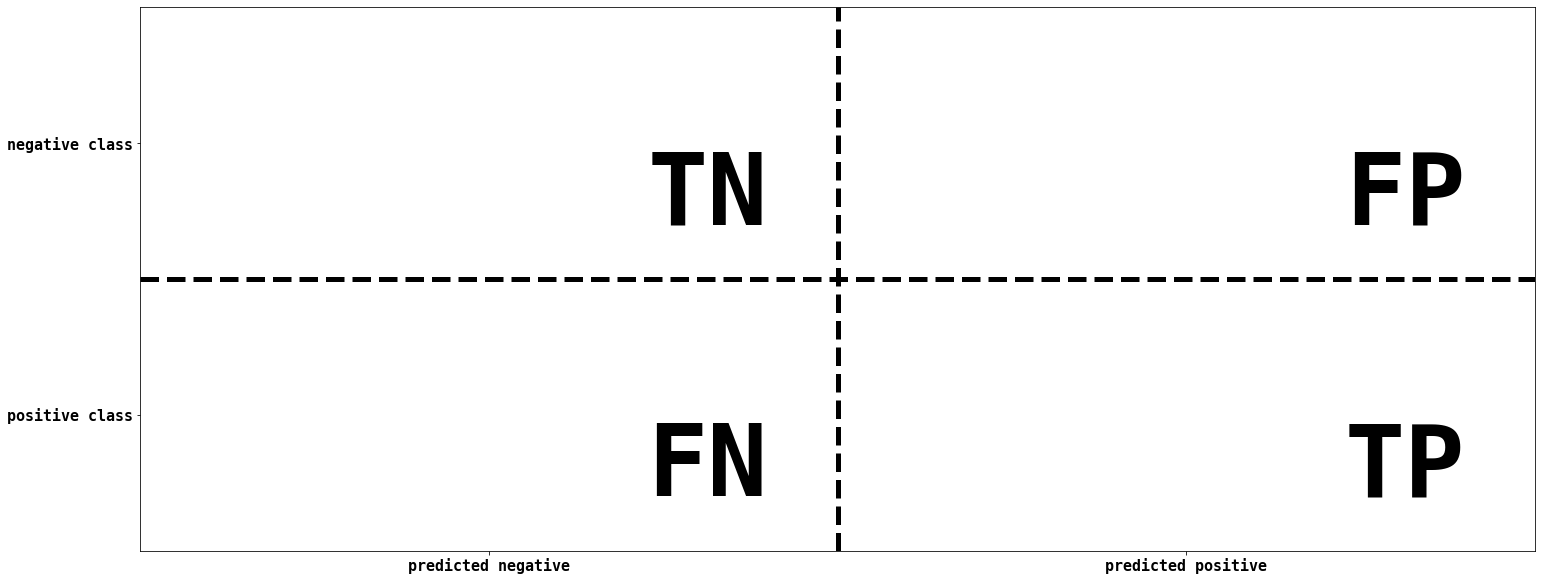

In [37]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 10]
mglearn.plots.plot_binary_confusion_matrix()

In [91]:
print("Most frequent class:")
print(confusion_matrix(y_test,pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test,pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[370  33]
 [ 43   4]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  7  40]]


## Accuracy: $\frac{TP+TN}{TP + TN + FP + FN}$

* Precision: $\frac{TP}{TP + FP}$ (fraction of relevant instances among the retrieved instances)

* Recall:    $\frac{TP}{TP + FN}$  (fraction of the total amount of relevant instances that were actually retrieved) 

* f-score:  $2\cdot \frac{precision\cdot recall}{precision+recall}$ (harmonic mean of precision and recall)

<center><img src="./images/precisionrecall.png" style="width: 1000px;"/></center>

<center><img src="./images/cm1.png" style="width: 1000px;"/></center>


<center><img src="./images/cm2.png" style="width: 800px;"/></center>


<center><img src="./images/cm1.png" style="width: 1000px;"/></center>


In [92]:
from sklearn.metrics import f1_score

print("f1 score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.10
f1 score tree: 0.55
f1 score logistic regression: 0.90


In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [94]:
print(classification_report(y_test, pred_dummy,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.92      0.91       403
        nine       0.11      0.09      0.10        47

    accuracy                           0.83       450
   macro avg       0.50      0.50      0.50       450
weighted avg       0.81      0.83      0.82       450



In [95]:
print(classification_report(y_test, pred_logreg,target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.85      0.90        47

    accuracy                           0.98       450
   macro avg       0.97      0.92      0.94       450
weighted avg       0.98      0.98      0.98       450



## Taking uncertainty into account

Most of classifiers provide a:

* decision_function
* predict_proba

You can modify the output by tuning a threshold.

>If you do set a threshold, don't use the test set. As with any other parameter, setting a decision threshold on the test set is likely to yield overly optimistic results. Use a validation set or cross-validation instead.

In [96]:
from mglearn.datasets import make_blobs

X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.1).fit(X_train, y_train)

In [97]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 12}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [30, 10]

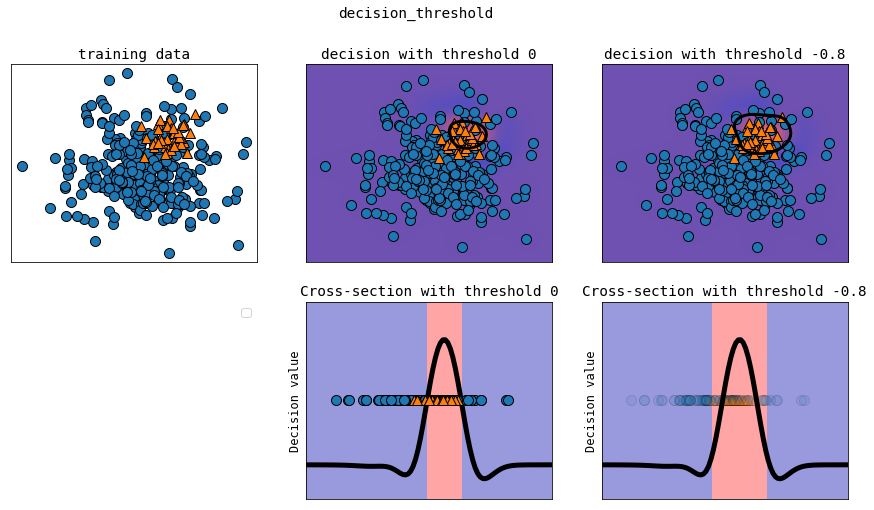

In [98]:
mglearn.plots.plot_decision_threshold()

In [99]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       104
           1       0.29      0.67      0.40         9

    accuracy                           0.84       113
   macro avg       0.63      0.76      0.65       113
weighted avg       0.91      0.84      0.87       113



In [100]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



## Precision-recall curves and ROC curves

Adjust the trade-off of precision and recall for a given classifier.

In [46]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
rc('font', **font) 
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams['lines.markersize'] = 20
#plt.rcParams.keys()

In [101]:
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
y_test, rf.predict_proba(X_test)[:, 1])

In [102]:
def plot_pre_rec():
    plt.plot(precision, recall, label="svc")
    plt.plot(precision[close_zero], recall[close_zero], 'o',
             label="threshold zero svc", fillstyle="none", c='k', mew=2)
    plt.plot(precision_rf, recall_rf, label="rf")
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', 
             label="threshold 0.5 rf", fillstyle="none", mew=2)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.legend(loc="best")

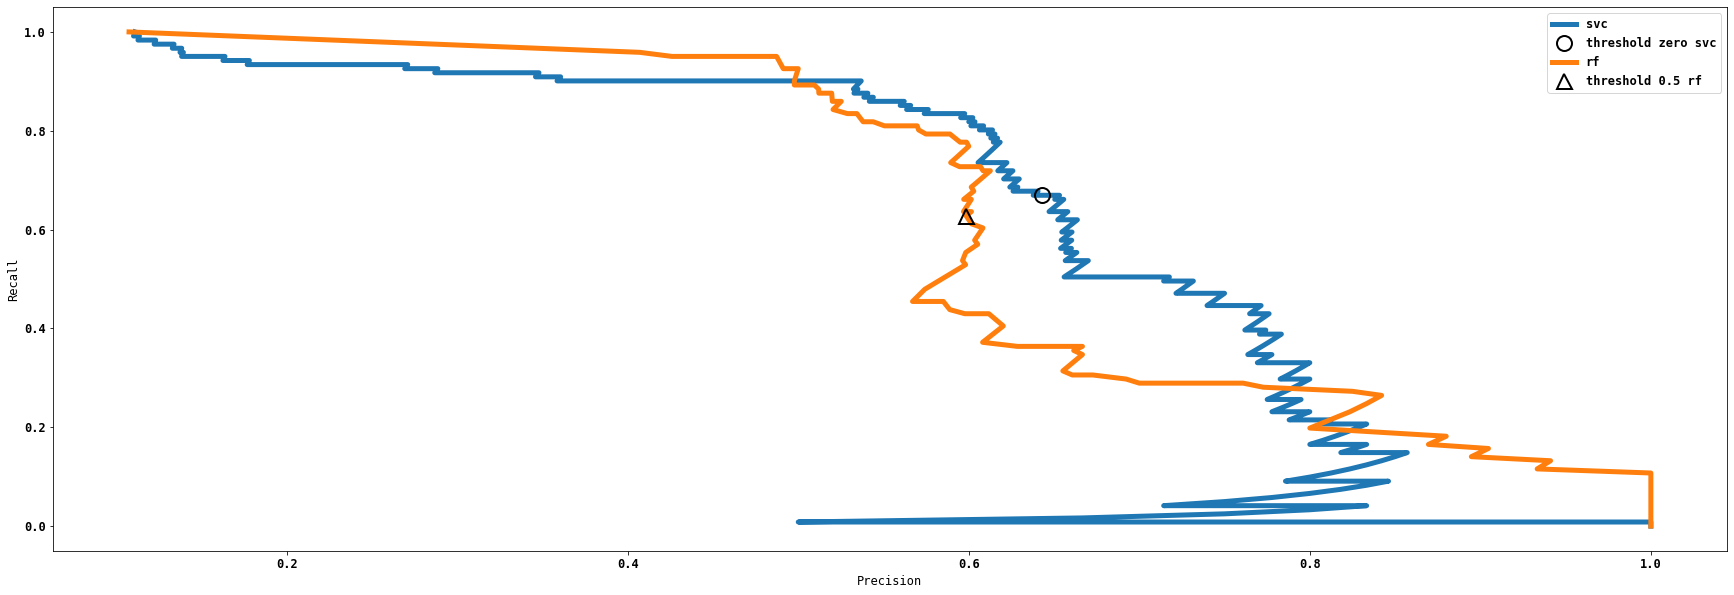

In [103]:
plot_pre_rec()

In [104]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


## Receiver operating characteristics (ROC) and AUC
* false positive rate (FPR) against the true positive rate (TPR)

<center><img src="./images/ROC_space.png" style="width: 850px;"/></center>


In [105]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
    plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^',
    label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

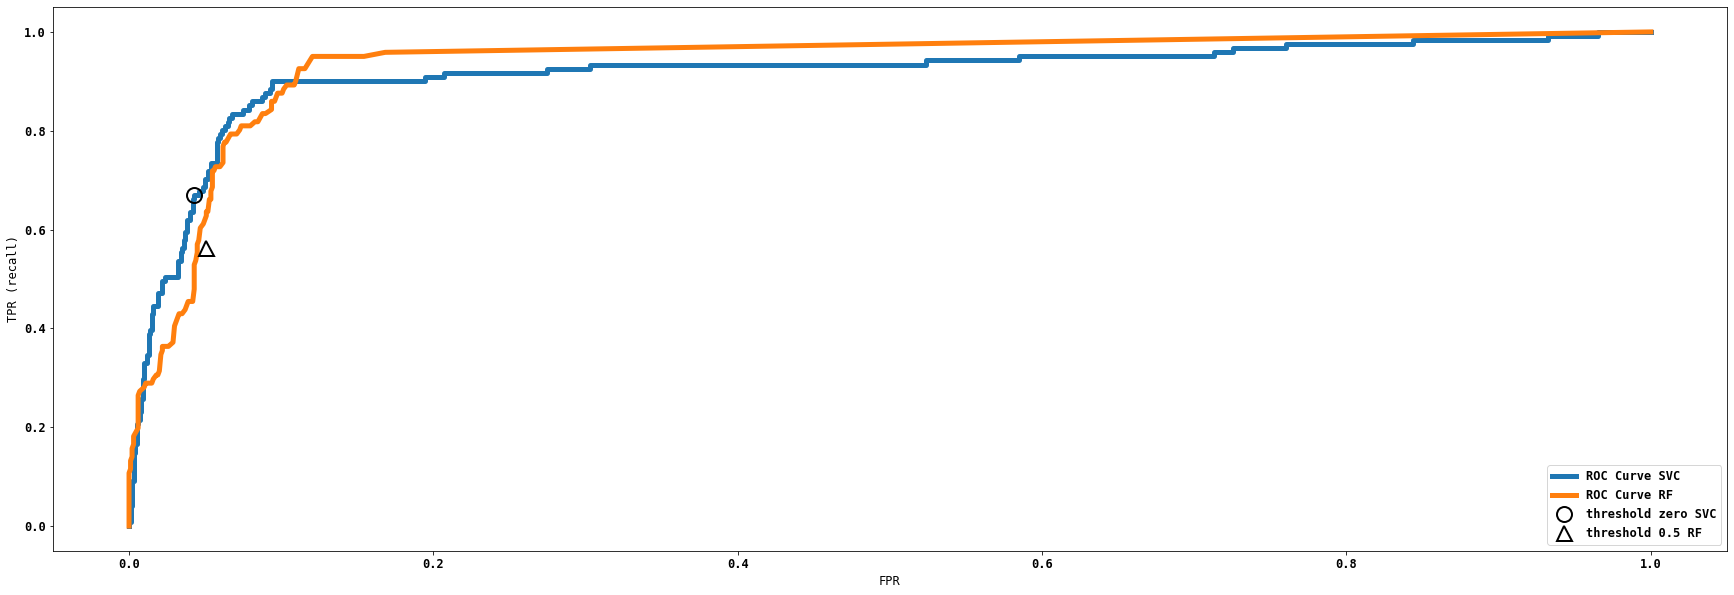

In [106]:
plot_roc_curve()

In [54]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


*AUC is a better metric for imbalanced classification problems than accuracy.*

## Metrics for Multiclass Classification

Same than binary classification metrics, but averaged over all classes.

In [107]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


In [108]:
def plot_conf_matrix():
    scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
    plt.title("Confusion matrix")
    plt.gca().invert_yaxis()

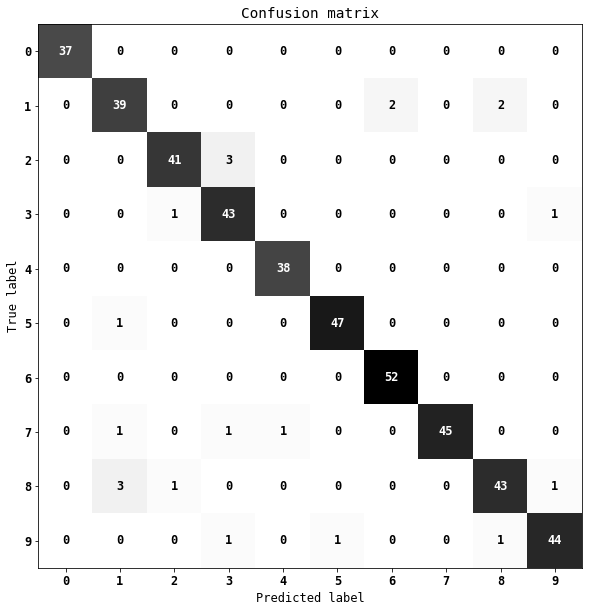

In [109]:
plot_conf_matrix()

In [59]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



## Using Evaluation Metrics in Model Selection

How to include your metric in your model selection using GridSearchCV or cross_val_score.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.970
Test set AUC: 0.992
Test set accuracy: 0.973


In [111]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.997
Test set AUC: 1.000
Test set accuracy: 1.000


In [62]:
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


<center><img src="./images/questions.png" alt="Drawing" style="width: 750px;"/></center>


# Conclusions

* Cross-validation or the use of a test set allow us to evaluate a machine learning model as it will perform in the future.
* Make sure that the metric you choose to evaluate and select a model for is a good stand-in for what the model will actually be used for.

# Break

<center>
<img src="./images/break.png" style="width:1200px">
</center>

<center>
<img src="./images/hmw.png" style="width:1200px">
</center>

# Homework 3

After you have tested some classifiers/regressors on the wines dataset (homework 1), you need to improve your models. Your tasks for this homework are:

* Use gridsearch with cross validation to improve **one** of your previously submitted models (Homework 1) for each problem: regression, binary classification and multiclass classification. Select your parameters and scan their possible values properly (hint: use numpy). Report the test set score, best parameters, best cross-validation score and best estimator. What is the improvement with respect to the past results?


* For your binary classification problem, use gridsearch and cross-validation with SVC. What is the best kernel? Print the heat map of mean cross-validation score (hint: use the mglearn library), the ROC curve and report the AUC value.


* For your binary classification model, repeat the gridsearch with cross validation step using AUC as the evaluation metric. Do the result improves? Elaborate.

You can work in small groups but you should submit your notebook individually. *Deadline 15 of November at midnight.*

<center>
<img src="./images/taf.png" style="width:1200px">
</center>